In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows and basic info
print(df.head())
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print(df.isnull().sum())
print(df['Churn'].value_counts())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [4]:
import pandas as pd

# Convert TotalCharges to numeric, handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful for analysis)
df.drop('customerID', axis=1, inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-4-217381448>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary columns (e.g., Churn: Yes/No -> 1/0)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# One-hot encode categorical columns with multiple categories
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines'], drop_first=True)

# Verify encoding
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport  ... Churn  \
0             No          Yes               No          No  ...     0   
1            Yes           No              Yes          No  ...     0   
2            Yes          Yes               No          No  ...     1   
3            Yes           No              Yes         Yes  ...     0   
4             No           No               No          No  ...     1   

  Contract_One year Contract_Two year  PaymentMethod_Credit card (automatic)  \
0             False             False                                  F

In [6]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify scaling
print(df[num_cols].describe())

             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01    8.338335e-01  6.642871e-01
max    1.613701e+00    1.794352e+00  2.826743e+00



Numeric Columns Selected for Correlation: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


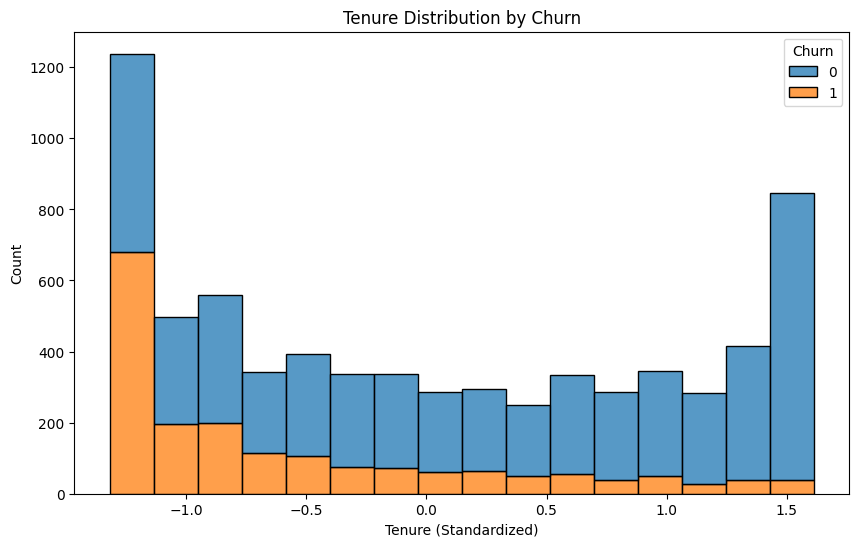

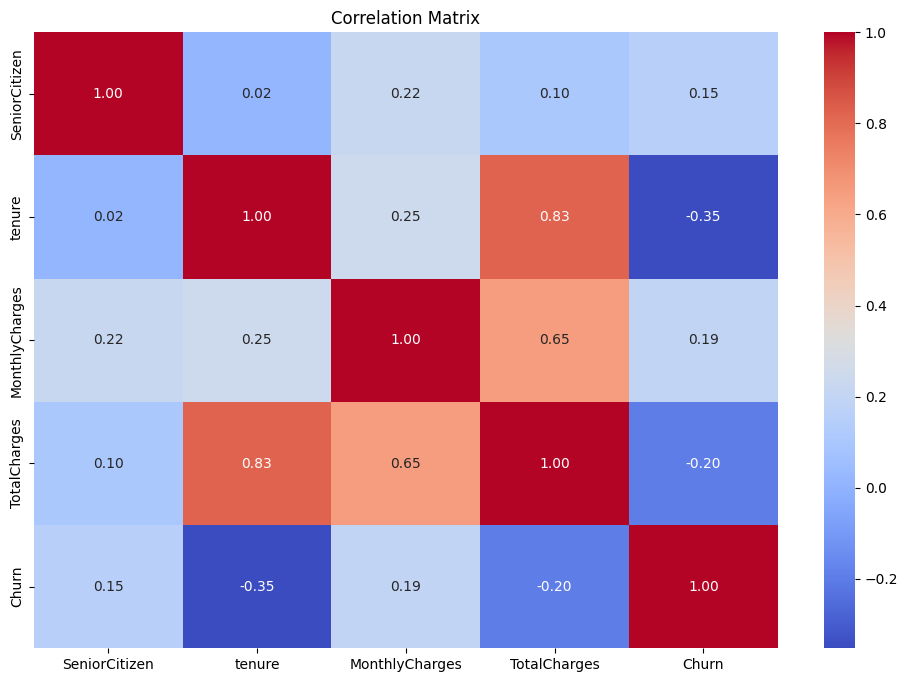

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns Selected for Correlation:", numeric_cols)

# Distribution of tenure by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Standardized)')
plt.ylabel('Count')
plt.savefig('tenure_churn.png')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

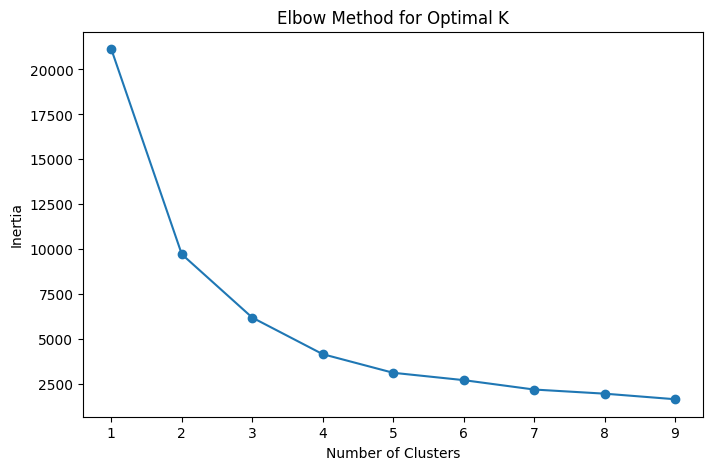

           tenure  MonthlyCharges  TotalCharges
Cluster                                        
0        0.863870       -0.991812     -0.196607
1        1.105959        0.948704      1.442198
2       -0.901642       -1.096539     -0.871022
3       -0.690059        0.532372     -0.454243


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_cluster = df[cluster_features]

# Elbow method to find optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_curve.png')
plt.show()

# Apply K-means with chosen k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Analyze clusters
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print(cluster_summary)

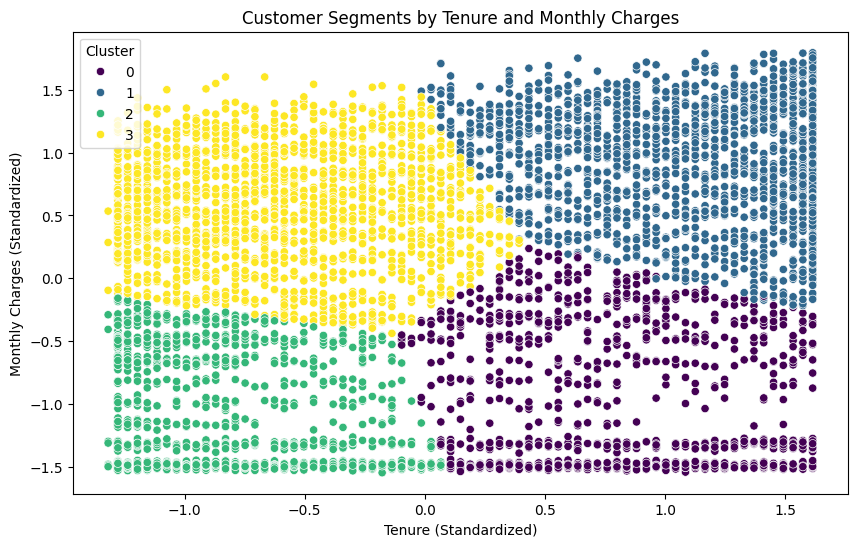

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of tenure vs. MonthlyCharges colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.xlabel('Tenure (Standardized)')
plt.ylabel('Monthly Charges (Standardized)')
plt.savefig('cluster_scatter.png')
plt.show()

In [20]:
print(df.groupby('Cluster')['Churn'].mean())

Cluster
0    0.050043
1    0.153887
2    0.246479
3    0.482425
Name: Churn, dtype: float64


In [22]:
# Preprocessing: Clean and encode categorical columns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop('customerID', axis=1, inplace=True, errors='ignore')

# Encode binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Encode multi-category columns
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=[col for col in multi_cols if col in df.columns], drop_first=True)

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Verify balance
print(y_train_sm.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


<ipython-input-22-2351345380>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


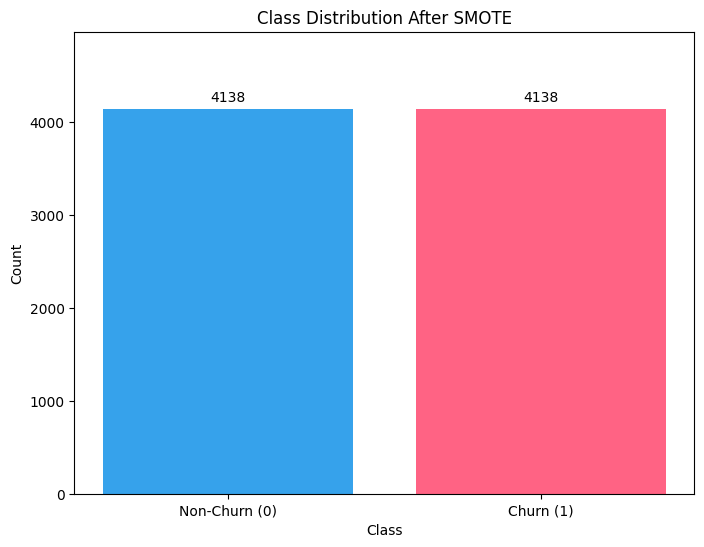

In [24]:
class_counts = pd.Series({0: 4138, 1: 4138})  # Non-Churn (0), Churn (1)

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values,
               color=['#36A2EB', '#FF6384'],
               tick_label=['Non-Churn (0)', 'Churn (1)'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.ylim(0, max(class_counts.values) * 1.2)  # Add padding to y-axis

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval),
             ha='center', va='bottom')

# Save plot
plt.savefig('class_distribution_smote.png', bbox_inches='tight')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Feature Importance:")
print(feature_importance.sort_values(ascending=False))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.57      0.64      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

Confusion Matrix:
[[855 181]
 [135 238]]
Feature Importance:
TotalCharges                             0.161820
tenure                                   0.158965
MonthlyCharges                           0.144323
PaymentMethod_Electronic check           0.053821
Contract_Two year                        0.051461
InternetService_Fiber optic              0.045295
Cluster                                  0.038738
Contract_One year                        0.026015
gender                                   0.024290
Dependents                               0.023592
PaperlessBilling                         0.022953
Partner                                

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


In [27]:
df.to_csv('processed_data.csv', index=False)

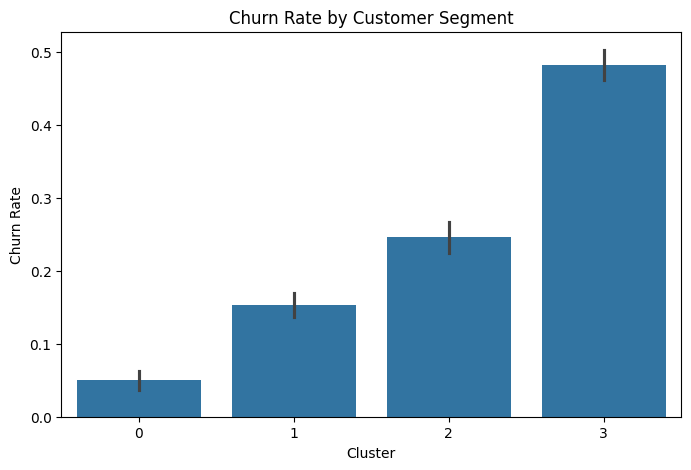

In [29]:
# Churn rate by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Churn', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.savefig('churn_by_cluster.png')
plt.show()